In [28]:
import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-5.3.0-posix-seh-rt_v4-rev0\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats, integrate
import matplotlib.pyplot as plt
# import seaborn as sns
from numpy import sort
#import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from xgboost import plot_importance
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import random
from sklearn import metrics, preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans

In [29]:
data_path = "F:\\Users\\ivann_000\\AnacondaProjects\\MLBootcamp4\\data"
X = pd.read_csv(data_path+"\\x_train.csv", sep=';', header=None)
y = pd.read_csv(data_path+"\\y_train.csv", sep=';', header=None)[0]
XX = pd.DataFrame(preprocessing.minmax_scale(X, (0,1)))
# XX['class'] = y

In [30]:
corrs = np.array([
    [0, 6, 26, 30, 70, 135, 138, 193, 208, 183, 51, 120],
    [1, 2, 7, 118, 200, 216, 117, 46, 94, 218, 167, 199],
    [17, 18, 27, 59, 72, 79, 108, 114, 168, 171, 179, 184],
    [35, 76, 58, 104, 87, 102, 107, 128, 144, 155, 190, 218],
    [77, 84, 127, 131, 146, 148, 154, 47, 49, 209, 212, 33],
    [81, 185, 215, 89, 188, 213, 101, 130,22, 112, 71, 191]
])
corrs_x = np.array([])

In [34]:
for i, c in enumerate(corrs):
    for j, k in enumerate(c):
        if j == 0:
            XX['mean_m_'+str(i)] = XX[k]
        else:
            XX['mean_m_'+str(i)] = XX['mean_m_'+str(i)] + XX[k]
#     XX['mean_m_'+str(i)] = XX['mean_m_'+str(i)]/12
    print(XX['mean_m_'+str(i)].mean())

4.8668992788049605
4.176335189582823
5.344143056749831
2.9727975581306167
2.2834841314167877
5.230679133753624
229


In [49]:
XXX = XX.copy()
kmeans = KMeans(n_clusters=4, random_state=0).fit(XXX)
XXX['class']=kmeans.labels_
labels = [x for x in range(4)]
print(labels)
for label in labels:
    XX['km_is_'+str(label)] = (XXX['class']==label)*1.0
sum = 0
for label in labels:
    sum += len(XX['km_is_'+str(label)][XX['km_is_'+str(label)]==1])
    print(label, len(XX['km_is_'+str(label)][XX['km_is_'+str(label)]==1]))
print(len(XX.columns))

[0, 1, 2, 3]
0 774
1 675
2 1192
3 848
233


In [35]:
XX = pd.DataFrame(preprocessing.minmax_scale(XX, (0,1)))

In [36]:
len(XX.columns)

229

Feature ranking:
1. feature 5 (0.053269) - 0.012586
2. feature 54 (0.043319) - 0.040457
3. feature 64 (0.032849) - 0.034204
4. feature 32 (0.030050) - 0.020286
5. feature 30 (0.020430) - 0.018403
6. feature 6 (0.019061) - 0.015094
7. feature 72 (0.018991) - 0.013949
8. feature 9 (0.018204) - 0.021536
9. feature 71 (0.016817) - 0.028129
10. feature 52 (0.016732) - 0.009811
11. feature 37 (0.015353) - 0.010019
12. feature 0 (0.014895) - 0.022204
13. feature 1 (0.014677) - 0.007993
14. feature 41 (0.014580) - 0.010876
15. feature 53 (0.014414) - 0.011005
16. feature 46 (0.013891) - 0.008385
17. feature 73 (0.013551) - 0.008979
18. feature 66 (0.013529) - 0.007749
19. feature 42 (0.013391) - 0.008237
20. feature 21 (0.013363) - 0.007540
21. feature 27 (0.013294) - 0.008802
22. feature 59 (0.012690) - 0.007485
23. feature 34 (0.012532) - 0.007591
24. feature 69 (0.012525) - 0.007190
25. feature 56 (0.012510) - 0.006965
26. feature 40 (0.012434) - 0.007510
27. feature 50 (0.012129) - 0.00767

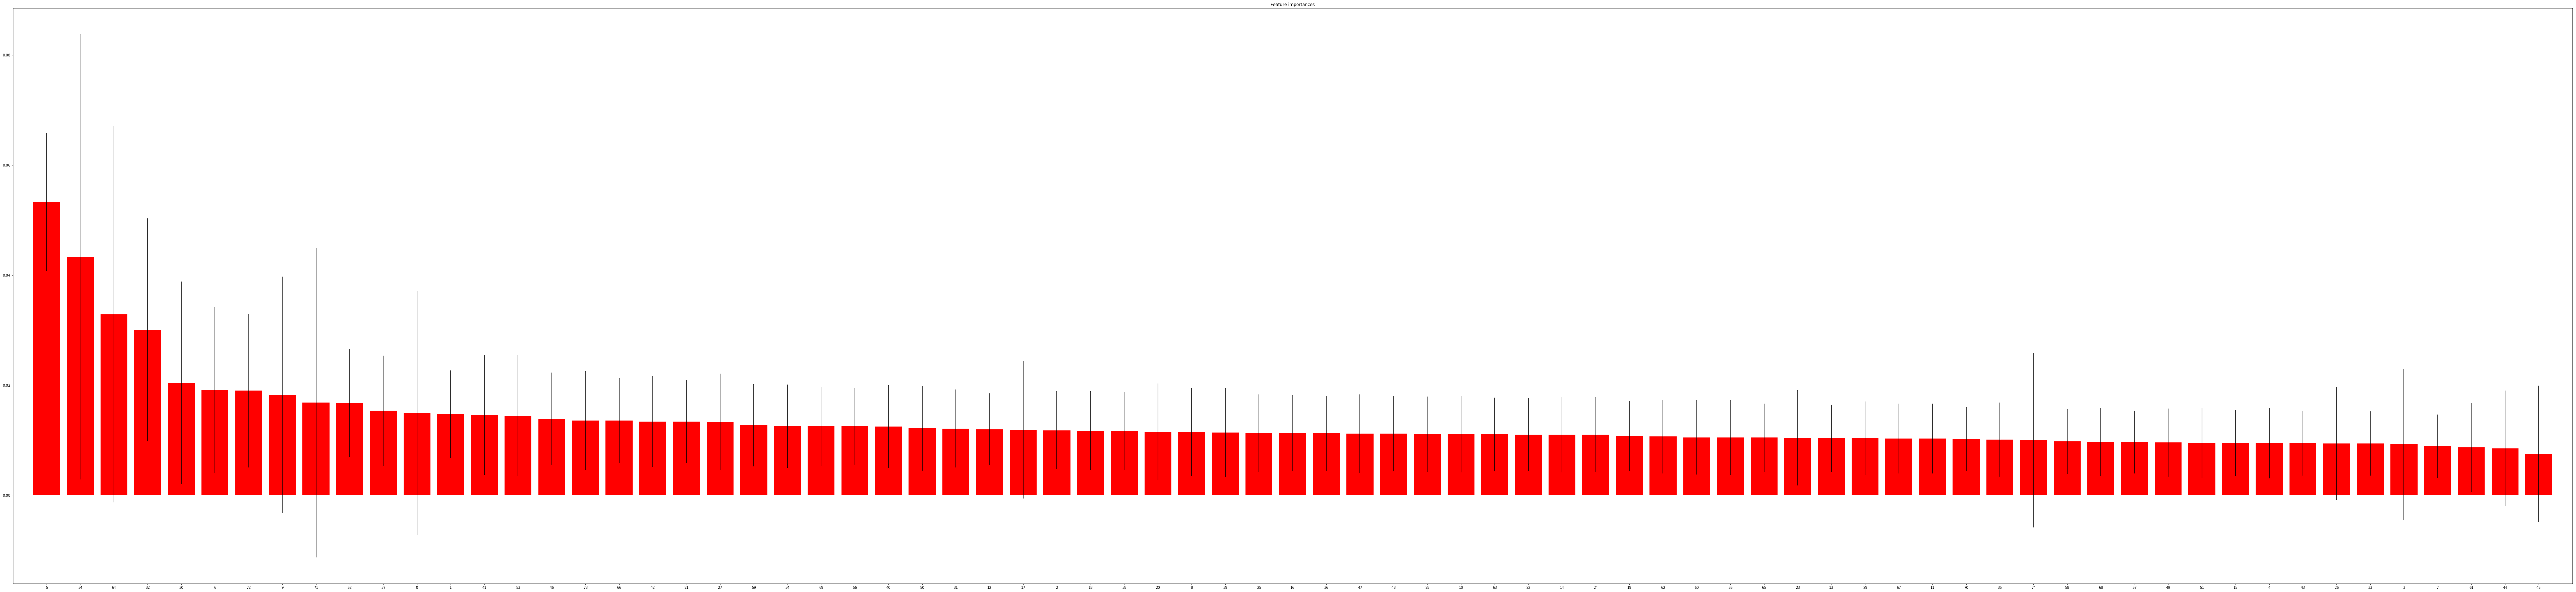

0.54284063092901913

In [42]:
model = RandomForestClassifier(n_estimators=1600,
                               n_jobs=8,
#                                oob_score=True,
                               max_features = None,
                               max_depth=15,
                               class_weight="balanced")
model.fit(XX, y)
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(XX.shape[1]):
    print("%d. feature %d (%f) - %f" % (f + 1, indices[f], importances[indices[f]], std[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(130,30))
plt.title("Feature importances")
plt.bar(range(XX.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(XX.shape[1]), indices)
plt.xlim([-1, XX.shape[1]])
plt.show()



cross_val_score(model, XX, y, scoring='accuracy', cv=3).mean()

In [ ]:
corrs = np.array([
    [0, 6, 26, 30, 70, 135, 138, 193, 208, 183, 51, 120],
    [1, 2, 7, 118, 200, 216, 117, 46, 94, 218, 167, 199],
    [17, 18, 27, 59, 72, 79, 108, 114, 168, 171, 179, 184],
    [35, 76, 58, 104, 87, 102, 107, 128, 144, 155, 190, 218],
    [77, 84, 127, 131, 146, 148, 154, 47, 49, 209, 212, 33],
    [81, 185, 215, 89, 188, 213, 101, 130,22, 112, 71, 191]
])

In [40]:
arr = XX.shape[1]
for f in range(arr):
    if importances[indices[f]] < 0.004977:
        XX = XX.drop([indices[f]], axis=1)


In [15]:
len(XX.columns)

173

In [16]:
model = RandomForestClassifier(n_estimators=400,
                               n_jobs=8,
#                                oob_score=True,
                               max_features = None,
                               max_depth=15,
                               class_weight="balanced")
cross_val_score(model, XX, y, scoring='accuracy', cv=3).mean()

0.5457057993020592

In [17]:
model = RandomForestClassifier(n_estimators=1500,
                               n_jobs=8,
#                                oob_score=True,
                               max_features = None,
                               max_depth=15,
                               class_weight="balanced")
cross_val_score(model, XX, y, scoring='accuracy', cv=3).mean()

0.5554512196204836